In [4]:
warning('off','all');
% pkg install -forge symbolic
pkg load symbolic;
graphics_toolkit("gnuplot");

Нека имаме следната задача на Коши

$$
\begin{cases}
y' = x^2 + y\\
y(0) = 2
\end{cases}
$$

1. Да се реши символно
2. Да се реши числено
3. Да се начертаят графиката на символното решение и графиката на численото проближение в интервала $x\in[0,3]$ в една и съща координатна система

## Символно решаване с dsolve

In [64]:
syms x y(x);  % символни променливи

x_0 = 0;
y_0 = 2;

equation = (diff(y, x)) == x^2 + y  % y' = x^2 + y

initial_condition_1 = y(x_0) == y_0  % y(x_0) = y_0

solution = dsolve([equation], [initial_condition_1])
% решенито е символен обект и не числена стойност, затова после се вика eval или double(subs(...))

equation = (sym)

  d           2       
  --(y(x)) = x  + y(x)
  dx                  

initial_condition_1 = (sym) y(0) = 2
solution = (sym)

     2            x    
  - x  - 2*x + 4*e  - 2



## Числено решаване с ode45

In [65]:
function dydx = f(x, y)
    dydx = x^2 + y;
end

xspan = [0 3];
y0 = [2];

[nodes, values] = ode45(@f, xspan, y0);

## Чертаене на графики

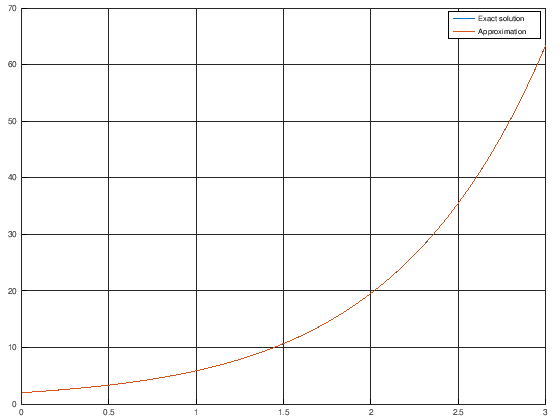

In [ ]:
hold on;  % всички елементи, които ще добавяме ще са върху текущата картинка и не върху друга
grid on;  % слага координатна система

x_axis = linspace(0, 3, 50);  % трябва да се казва точно x

% plot(x_axis, eval(solution)) ако работите на MATLAB
plot(x_axis, double(subs(solution, x, x_axis)))
plot(nodes, values)

legend("Exact solution", "Approximation")